# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [65]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [66]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [67]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [69]:
app_train['DAYS_EMPLOYED_ANOM'].value_counts().sort_values()

True      55374
False    252137
Name: DAYS_EMPLOYED_ANOM, dtype: int64

In [70]:
app_train['DAYS_BIRTH'].value_counts().sort_values(ascending=False).head()

13749    43
13481    42
10020    41
18248    41
15771    40
Name: DAYS_BIRTH, dtype: int64

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化

繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [71]:
app_train['age_equal_width'] = pd.cut(app_train['DAYS_BIRTH']/365, 10)
app_train['age_equal_width'].head()

0    (25.378, 30.238]
1    (44.819, 49.679]
2     (49.679, 54.54]
3     (49.679, 54.54]
4       (54.54, 59.4]
Name: age_equal_width, dtype: category
Categories (10, interval[float64]): [(20.469, 25.378] < (25.378, 30.238] < (30.238, 35.099] < (35.099, 39.959] ... (49.679, 54.54] < (54.54, 59.4] < (59.4, 64.26] < (64.26, 69.121]]

In [72]:
app_train['age_equal_freq'] = pd.qcut(app_train['DAYS_BIRTH']/365, 10)
app_train['age_equal_freq'].head()

0    (20.517, 28.175]
1    (43.151, 47.178]
2     (51.74, 56.093]
3     (51.74, 56.093]
4     (51.74, 56.093]
Name: age_equal_freq, dtype: category
Categories (10, interval[float64]): [(20.517, 28.175] < (28.175, 32.038] < (32.038, 36.0] < (36.0, 39.496] ... (47.178, 51.74] < (51.74, 56.093] < (56.093, 60.77] < (60.77, 69.121]]

In [73]:
app_train['age_equal_width'].sort_values().value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: age_equal_width, dtype: int64

In [74]:
app_train['age_equal_freq'].sort_index().value_counts()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: age_equal_freq, dtype: int64

In [75]:
import seaborn as sns

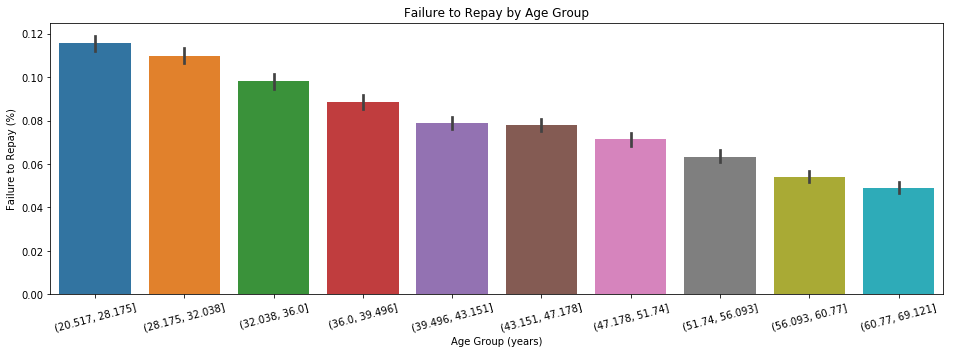

In [76]:
plt.figure(figsize = (16, 5))

px = app_train['age_equal_freq']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 15); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

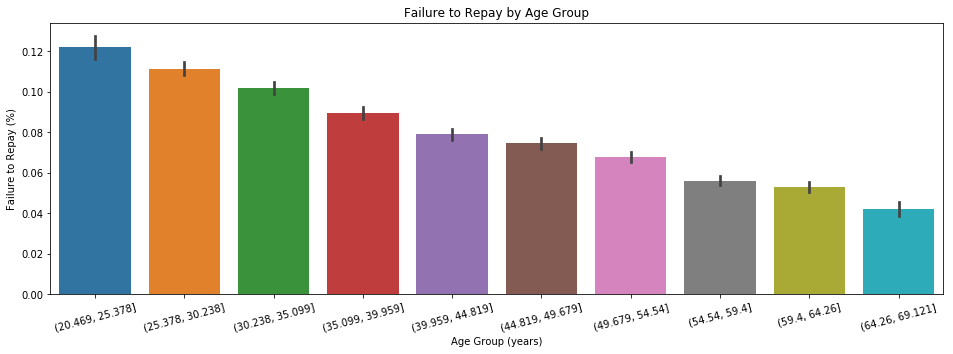

In [77]:
plt.figure(figsize = (16, 5))

px = app_train['age_equal_width']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 15); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');